# Projet 2 : Diabetes Prediction explained with SHAP

## Loading the data

The dataset used in this project is the [diatetes2](https://www.kaggle.com/datasets/cjboat/diabetes2) dataset from Kaggle.

The dataset contains 9 columns and 768 rows. The columns are:
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome

In [44]:
# Load from csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
diabetes_data = pd.read_csv('diabetes.csv')

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Random Forest Classifier

A Random Forest classifier is built to predict diabetes outcomes using the diabetes dataset.

For the parameters of the Random Forest classifier, we limit the maximum features to 2. We have set the number of trees to 100. More the number of trees, the better the model will be. However, it will take more time to train the model.

In [35]:
# Load useful libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Separate Features and Target Variables
X = diabetes_data.drop(columns='Outcome')
y = diabetes_data['Outcome']

# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                	stratify =y,
                                                	random_state = 13)

# Build the model
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)

rf_clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = rf_clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       161
           1       0.62      0.71      0.66        70

    accuracy                           0.78       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.79      0.78      0.78       231



The model is not very accurate. The f1-score is `0.78`, which is correct but not excellent.
But it is enough to explain the model with SHAP.

## SHAP

Creation of a SHAP explainer to explain the Random Forest classifier.
We apply the SHAP explainer on the `X_test` dataset.

In [36]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(X_test)

### Most important features

In this plot, we are ranked the features by their importance. The most important feature is `Glucose`, followed by `BMI` and `Age`.

That means that the `Glucose` level is the most important feature to predict diabetes outcomes.

We can also see that the importance of the features does not change much depending on the class. The most important features are the same for both classes.

This plot also shows that the `BloodPressure` and `SkinThickness` features are not important to predict diabetes outcomes.

Variable Importance Plot - Global Interpretation


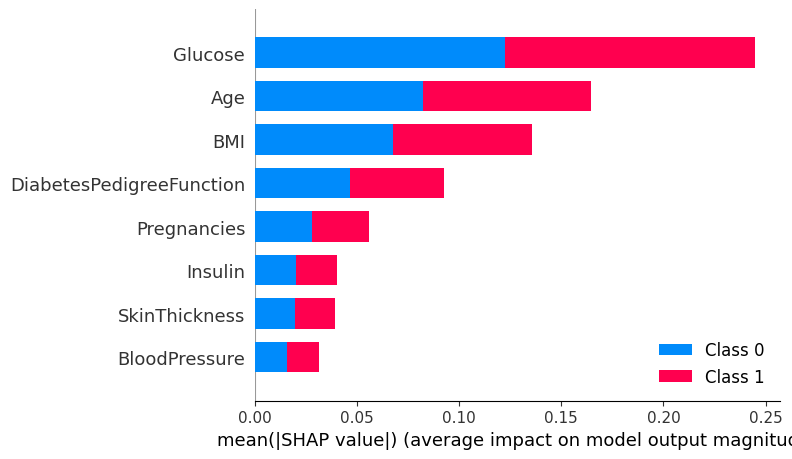

In [37]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

We can also print another plot to see the SHAP values for each feature of the class 1.
To do this we use the `shap_values[1]` array, that contains the SHAP values for the class 1.

As we can see, the plot represent all the features points and the positive or negative impact of each feature on the prediction.

Points in red are the features that have a positive impact on the prediction, and points in blue are the features that have a negative impact on the prediction.

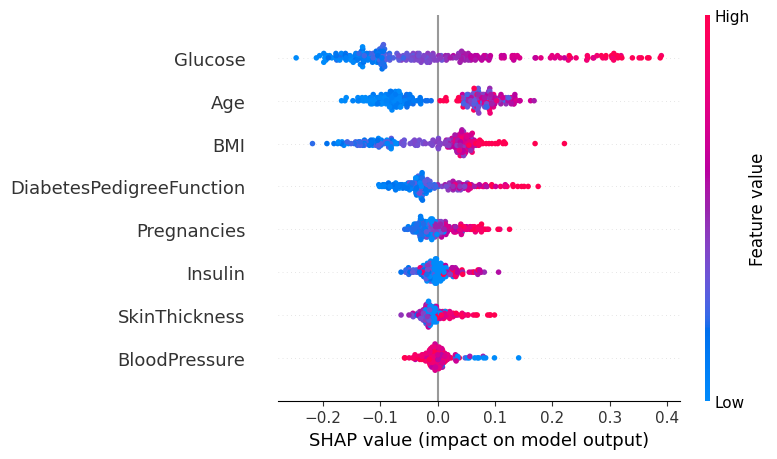

In [38]:
shap.summary_plot(shap_values[1], X_test)

### Lime Tabular Explainer

It is also possible to use the Lime Tabular Explainer to explain the Random Forest classifier.
This visualizes the most important features for the prediction of diabetes outcomes.

In [48]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['Has diabetes', 'No diabetes']

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =     
                                 feature_names,
                                 class_names = class_names, 
                                 mode = 'classification')

explaination = explainer.explain_instance(X_test.values[0],
                                            rf_clf.predict_proba,
                                            top_labels = 1)

# Plot the explaination
explaination.show_in_notebook()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
dt_clf.fit(X_train, y_train)

# Predict on the test data and evaluate the model
y_pred = dt_clf.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       181
           1       0.41      0.66      0.50        50

    accuracy                           0.72       231
   macro avg       0.65      0.70      0.65       231
weighted avg       0.78      0.72      0.74       231



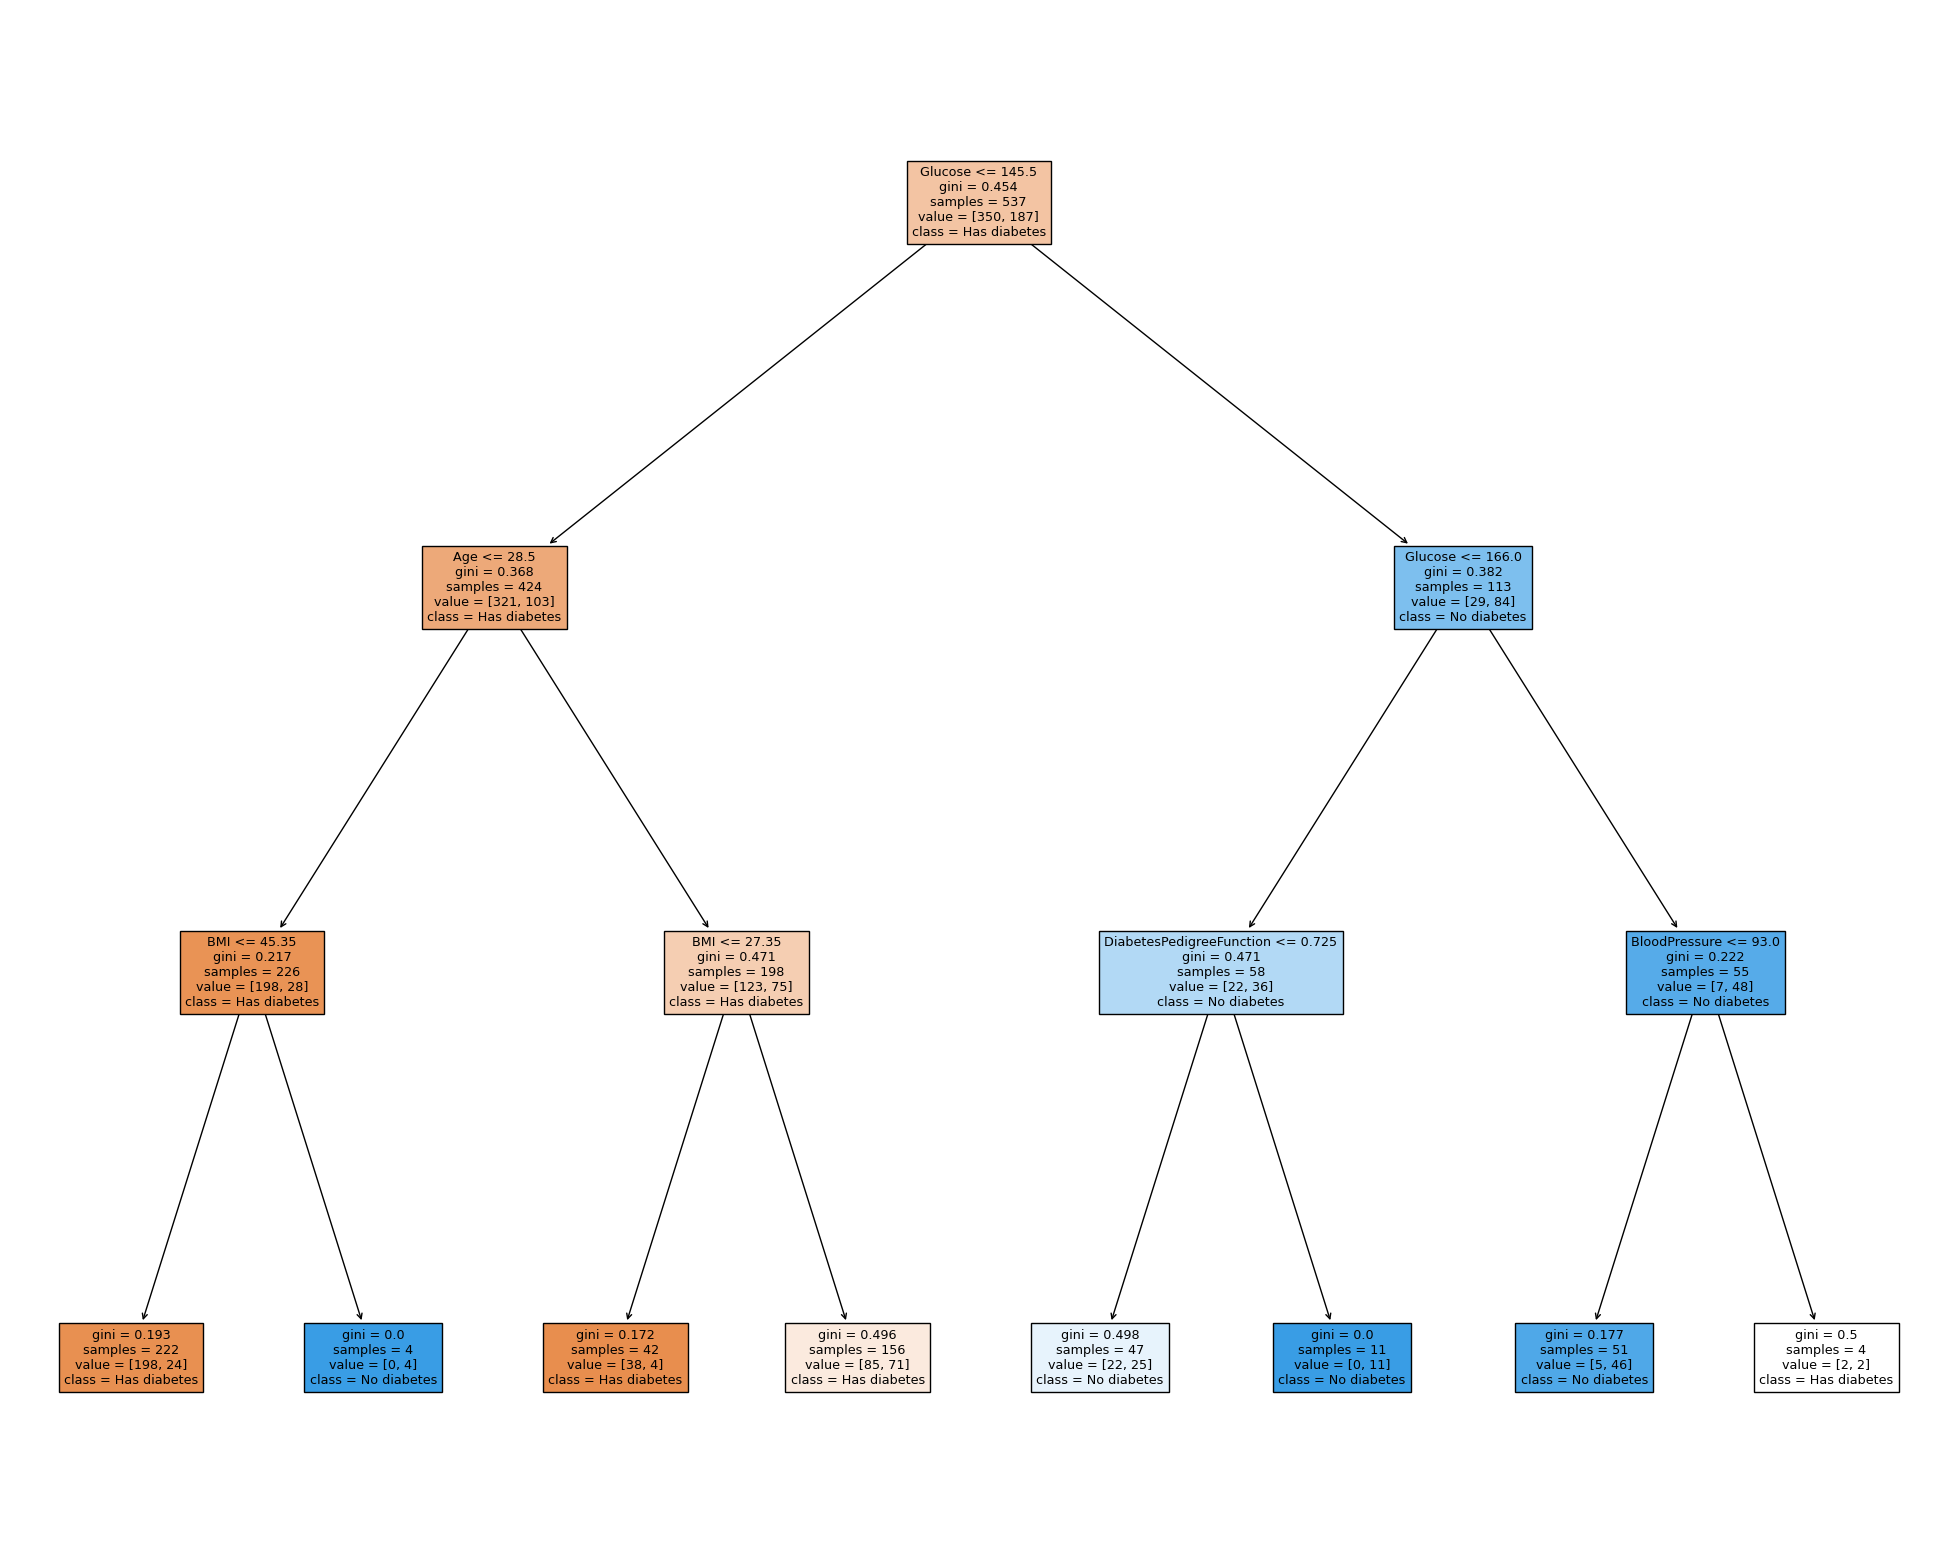

In [33]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_clf,
               	feature_names = feature_names,
               	class_names = class_names,
               	filled=True)